# Importing the necessary modules and tools

In [76]:
#======================================
import numpy as np; import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns ; import scipy
#======================================
import os, joblib, missingno
#======================================
# Sklearn Modules Preprocessing & Tuning
#======================================
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,cross_val_predict ,StratifiedKFold
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder,PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.pipeline import FeatureUnion,Pipeline
from sklearn_features.transformers import DataFrameSelector
#======================================
# Sklearn Modules Metrics
#======================================
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error ,roc_auc_score
#======================================
# Sklearn Modules Regression models
#======================================
from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor,VotingRegressor
from sklearn.tree import DecisionTreeRegressor
#======================================
# XG Boost Regressor
#======================================
from xgboost import XGBRegressor
#======================================
# Set notebook options
#======================================
pd.options.display.float_format = '{:,.3f}'.format
%matplotlib inline
#======================================
# Silence warnings
#======================================
import warnings
warnings.filterwarnings('ignore')
#======================================
print("Your Tools Has Been Imported")
#======================================

Your Tools Has Been Imported


In [23]:
#======================================
#    Read and explore the data
#======================================
# Get Data Path
data_path=os.path.join(os.getcwd(),"housing.csv")
df_Housing=pd.read_csv(data_path)
# Show DF head
df_Housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.230,37.880,41.000,880.000,129.000,322.000,126.000,8.325,"452,600.000",NEAR BAY
1,-122.220,37.860,21.000,"7,099.000","1,106.000","2,401.000","1,138.000",8.301,"358,500.000",NEAR BAY
2,-122.240,37.850,52.000,"1,467.000",190.000,496.000,177.000,7.257,"352,100.000",NEAR BAY
3,-122.250,37.850,52.000,"1,274.000",235.000,558.000,219.000,5.643,"341,300.000",NEAR BAY
4,-122.250,37.850,52.000,"1,627.000",280.000,565.000,259.000,3.846,"342,200.000",NEAR BAY


In [24]:
# Get More information about your Data
df_Housing.info()
print("-"*50)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
--------------------------------------------------


In [25]:
#  Show some statistics about the Dataset
df_Housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,"20,640.000","20,640.000","20,640.000","20,640.000","20,433.000","20,640.000","20,640.000","20,640.000","20,640.000"
mean,-119.570,35.632,28.639,"2,635.763",537.871,"1,425.477",499.540,3.871,"206,855.817"
std,2.004,2.136,12.586,"2,181.615",421.385,"1,132.462",382.330,1.900,"115,395.616"
min,-124.350,32.540,1.000,2.000,1.000,3.000,1.000,0.500,"14,999.000"
25%,-121.800,33.930,18.000,"1,447.750",296.000,787.000,280.000,2.563,"119,600.000"
50%,-118.490,34.260,29.000,"2,127.000",435.000,"1,166.000",409.000,3.535,"179,700.000"
75%,-118.010,37.710,37.000,"3,148.000",647.000,"1,725.000",605.000,4.743,"264,725.000"
max,-114.310,41.950,52.000,"39,320.000","6,445.000","35,682.000","6,082.000",15.000,"500,001.000"


In [26]:
# Check the nulls Values
df_Housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

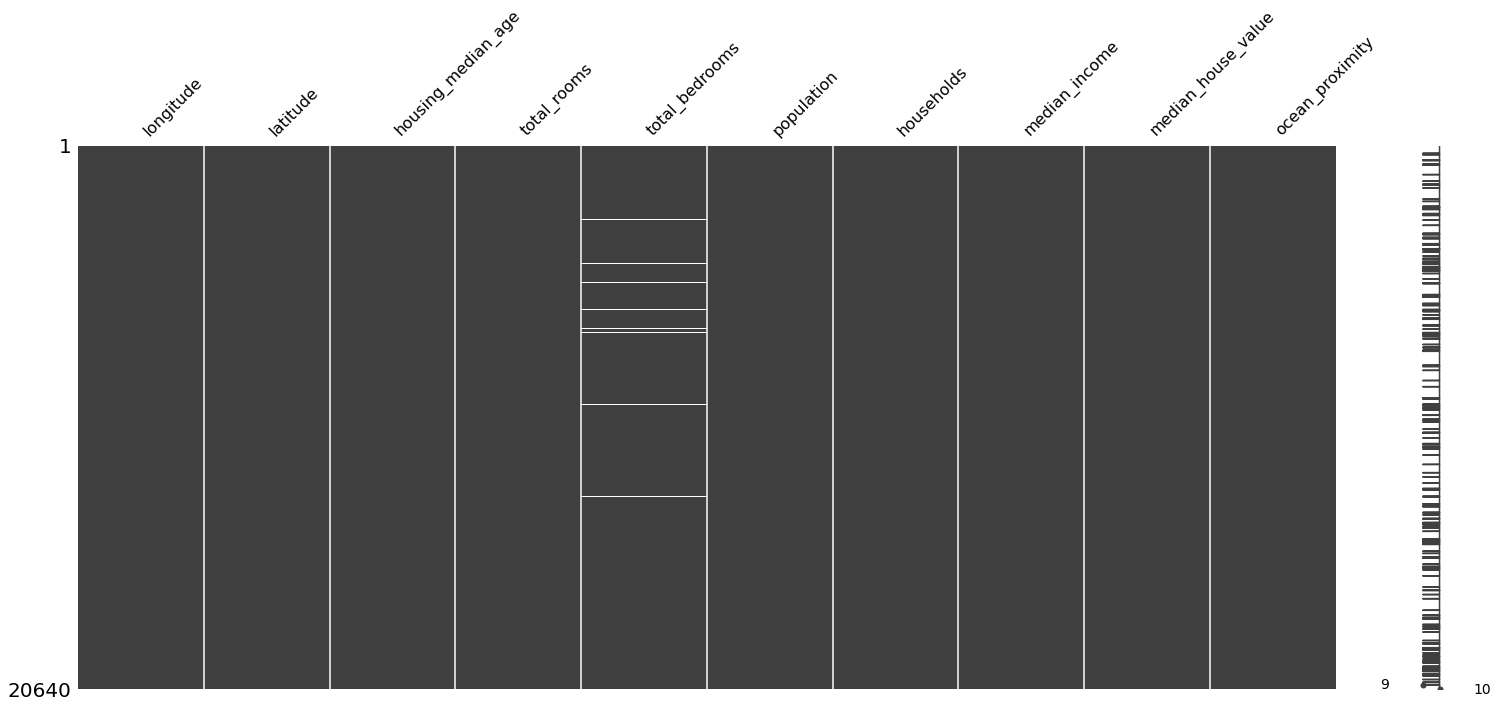

In [27]:
# check nulls using (missingno) library
missingno.matrix(df_Housing)
plt.show()

**Comment: It seems that Dataset is a contains 20640 instances and only 207 null values in total_bedrooms feature, and also all datatypes is float64 as they are continuous numerical features except the (ocean_proximity) column which is nominal categorical Feature**

# Exploratory Data Analysis

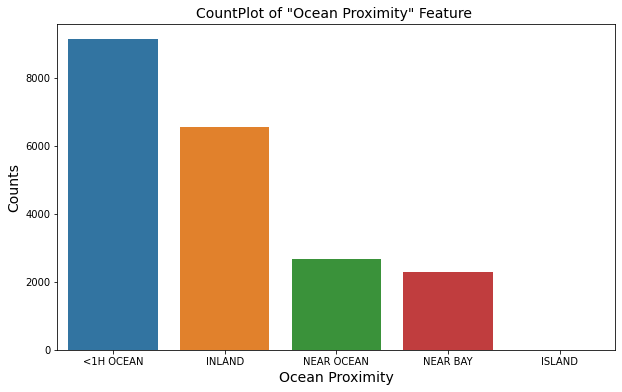

In [28]:
# Set Figuer Size
plt.figure(figsize=(10,6))
sns.countplot(df_Housing['ocean_proximity'],
                      data=df_Housing,
                    order=df_Housing['ocean_proximity'].value_counts().index)

plt.title('CountPlot of "Ocean Proximity" Feature ', fontsize=14, c='k')
plt.xlabel('Ocean Proximity', fontsize=14, c='k')
plt.ylabel('Counts', fontsize=14, c='k')

plt.show()

In [29]:
# Replace the  (<1H OCEAN) to (1H OCEAN)
df_Housing['ocean_proximity']=df_Housing['ocean_proximity'].replace('<1H OCEAN', '1H OCEAN')
df_Housing.ocean_proximity.unique()

array(['NEAR BAY', '1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

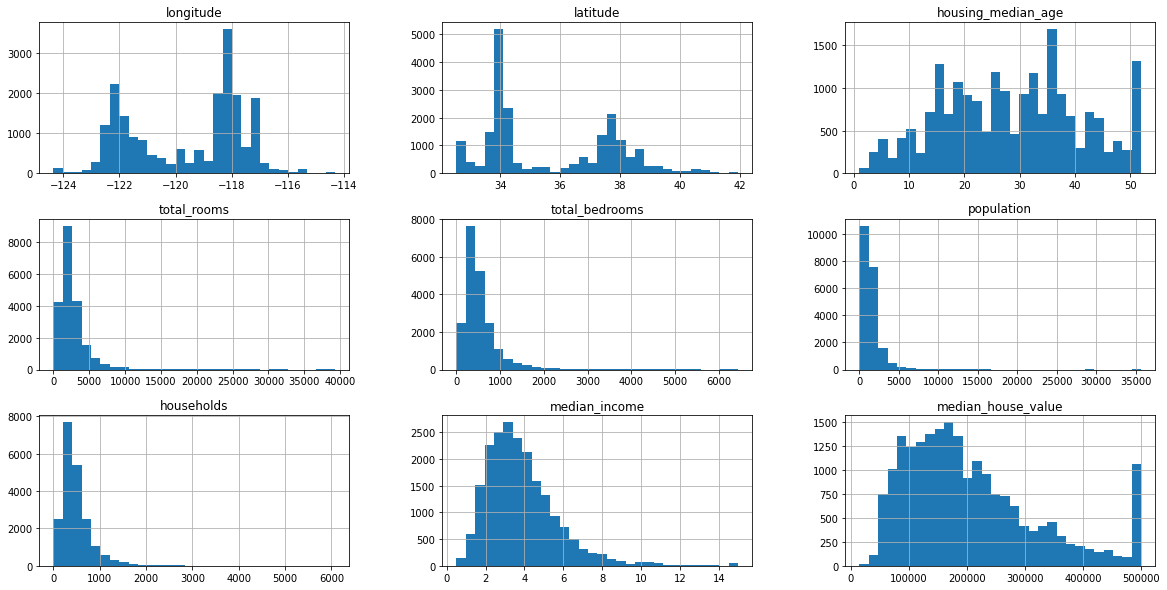

In [30]:
# Histogram Distr. of Numerical Features in Dataset
df_Housing.hist(bins=30, figsize=(20, 10))
plt.show()

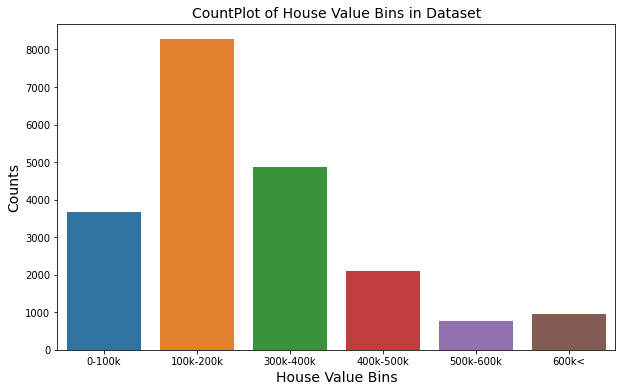

In [31]:
## Try for (median_house_value) to convert it into chunks (bins)
## Cut this Numerical Feature to Categorical One 
## Ex: for the following example -- any value between range (0-100k) will be the same category (like histogram)

house_value_bins = pd.cut(x=df_Housing['median_house_value'], 
                          bins=[-np.inf, 100000, 200000, 300000, 400000, 500000, np.inf],
                          labels=['0-100k', '100k-200k', '300k-400k', '400k-500k', '500k-600k', '600k<'])


## Countplot for the above chunks
plt.figure(figsize=(10, 6))
sns.countplot(x=house_value_bins)
plt.title('CountPlot of House Value Bins in Dataset', fontsize=14, c='k')
plt.xlabel('House Value Bins', fontsize=14, c='k')
plt.ylabel('Counts', fontsize=14, c='k')
plt.show()

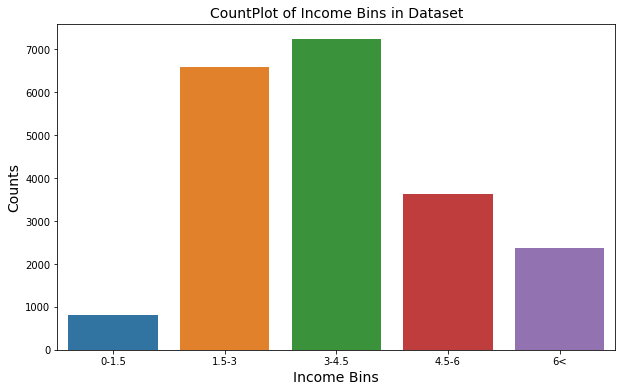

In [32]:
## Let's try the same above code for (median_income), I think it is very important Feature
income_bins = pd.cut(x=df_Housing['median_income'], 
                     bins=[-np.inf, 1.5, 3, 4.5, 6, np.inf], 
                     labels=['0-1.5', '1.5-3', '3-4.5', '4.5-6', '6<'])


## Countplot for the above chunks
plt.figure(figsize=(10, 6))
sns.countplot(x=income_bins)
plt.title('CountPlot of Income Bins in Dataset', fontsize=14, c='k')
plt.xlabel('Income Bins', fontsize=14, c='k')
plt.ylabel('Counts', fontsize=14, c='k')
plt.show() 


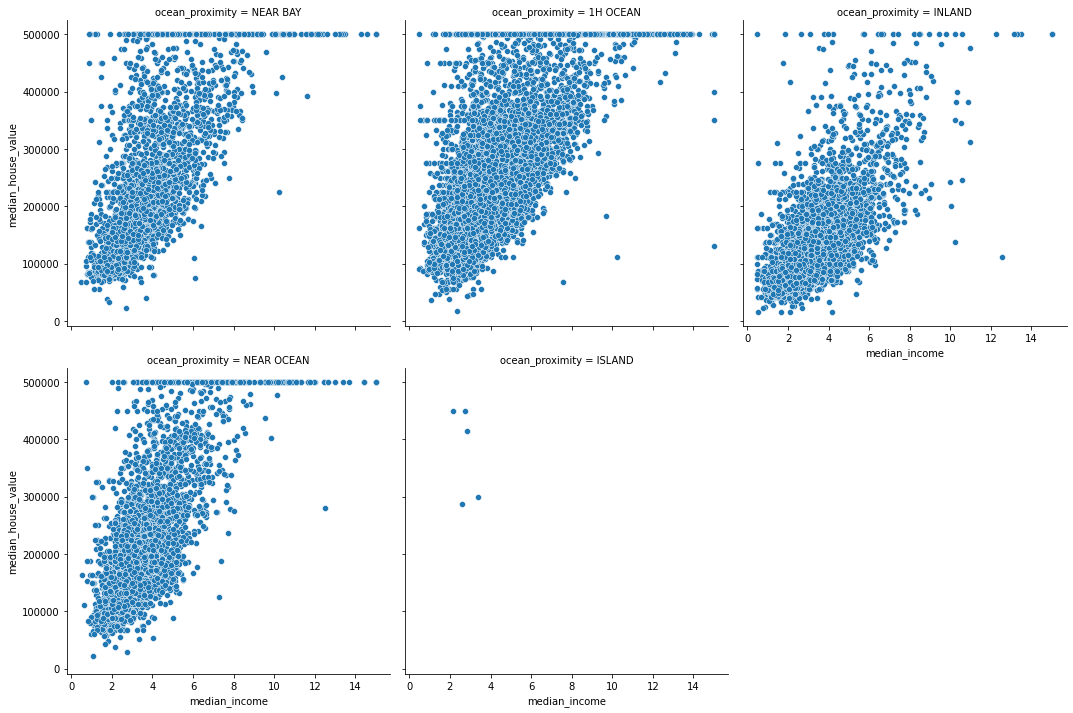

In [33]:
## Scatterplot with (median_income) & (median_house_value) at each (ocean_proximity)
sns.relplot(x='median_income', y='median_house_value', data=df_Housing, kind='scatter', 
            col='ocean_proximity', col_wrap=3)
plt.show()

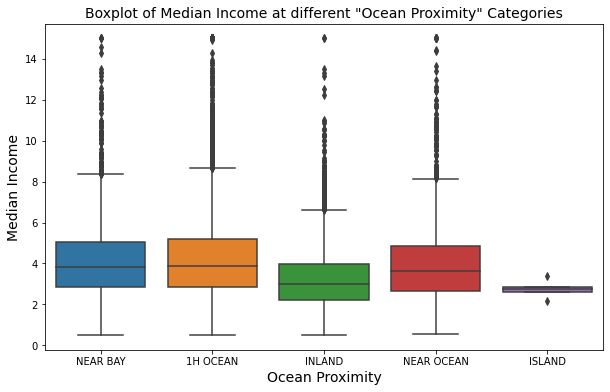

In [34]:
## Check the BoxPlot of the (median_income) at different Categories of (ocean_proximity)
plt.figure(figsize=(10, 6))
sns.boxplot(y='median_income', data=df_Housing, x='ocean_proximity')
plt.title('Boxplot of Median Income at different "Ocean Proximity" Categories', fontsize=14, c='k')
plt.xlabel('Ocean Proximity', fontsize=14, c='k')
plt.ylabel('Median Income', fontsize=14, c='k')
plt.show()


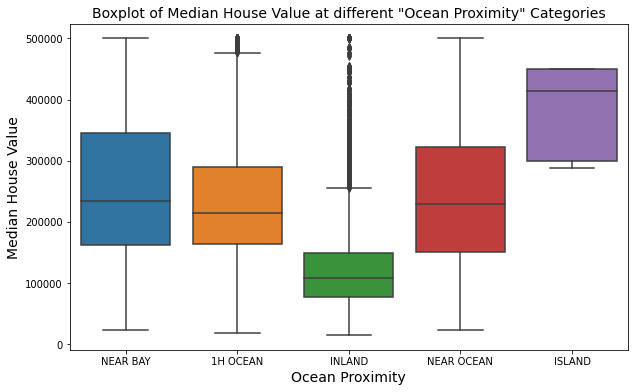

In [35]:
# Check the BoxPlot for (median_house_value) at different Categories of (ocean_proximity)
plt.figure(figsize=(10, 6))
sns.boxplot(y='median_house_value', data=df_Housing, x='ocean_proximity')
plt.title('Boxplot of Median House Value at different "Ocean Proximity" Categories', fontsize=14, c='k')
plt.xlabel('Ocean Proximity', fontsize=14, c='k')
plt.ylabel('Median House Value', fontsize=14, c='k')
plt.show()

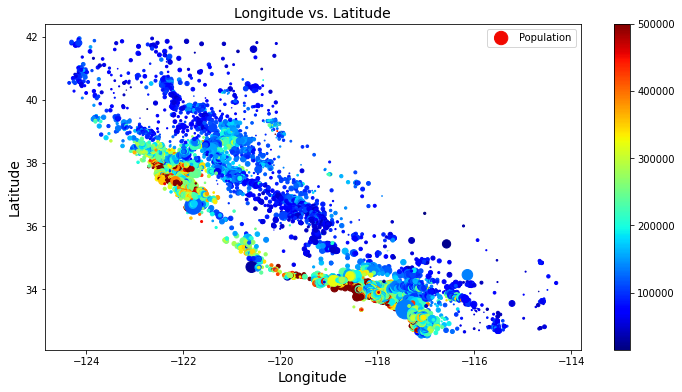

In [36]:
## ScatterPlot for (longitude & Latitude), and add (population) as size of point, and the color as (median_house_value)
plt.figure(figsize=(12, 6))
sc = plt.scatter(x=df_Housing['longitude'], y=df_Housing['latitude'], 
                 s=df_Housing['population']/100, c=df_Housing['median_house_value'], 
                 cmap=plt.get_cmap('jet'), label='Population')
plt.colorbar(sc)   
plt.xlabel('Longitude', fontsize=14, c='k')
plt.ylabel('Latitude', fontsize=14, c='k')
plt.title('Longitude vs. Latitude', fontsize=14, c='k')
plt.legend()
plt.show()

##### It seems that prices is higher near the ocean than other zones, and also these araes have higher population

# Check the Correlation between the Features and Target

In [37]:
df_Housing.corr()["median_house_value"].sort_values(ascending=False)

median_house_value    1.000
median_income         0.688
total_rooms           0.134
housing_median_age    0.106
households            0.066
total_bedrooms        0.050
population           -0.025
longitude            -0.046
latitude             -0.144
Name: median_house_value, dtype: float64

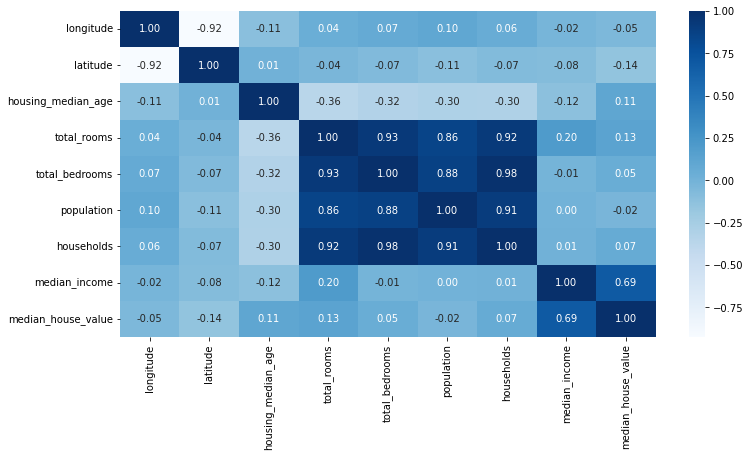

In [38]:
# you can show this as heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df_Housing.corr(), annot=True, cmap='Blues', fmt='.2f')  ## symmetric matrix
plt.show()

# Feature Engineering


In [39]:
#Try to make some Feature Engineering --> Feature Extraction --> Add the new column to the main DF
df_Housing['rooms_per_household'] = df_Housing['total_rooms'] / df_Housing['households']
df_Housing['bedroms_per_rooms'] = df_Housing['total_bedrooms'] / df_Housing['total_rooms']
df_Housing['population_per_household'] = df_Housing['population'] / df_Housing['households']

In [40]:
## check the correlation again
df_Housing.corr()['median_house_value'].sort_values(ascending=False)

median_house_value          1.000
median_income               0.688
rooms_per_household         0.152
total_rooms                 0.134
housing_median_age          0.106
households                  0.066
total_bedrooms              0.050
population_per_household   -0.024
population                 -0.025
longitude                  -0.046
latitude                   -0.144
bedroms_per_rooms          -0.256
Name: median_house_value, dtype: float64

In [41]:
#===============================
# Split the Dataset
#===============================
# Split the whole Dataset to Feature & Target
X = df_Housing.drop(columns=['median_house_value'], axis=1)  
y = df_Housing['median_house_value'] 
#===============================

# Data Preprocessing 

In [42]:
# Separete the columns according to type (numerical or categorical)
num_col=[col for col in X.columns if X[col].dtype in ['float32', 'float64', 'int32', 'int64'] ]
cat_col=[col for col in X.columns if X[col].dtype not in ['float32', 'float64', 'int32', 'int64']]
# useing Sklearn pipline to do preprocessing 
# first numerical pipline 
num_pipline=Pipeline([
                      ('selector',DataFrameSelector(num_col) ),
                      ('imputer', SimpleImputer(missing_values=np.nan ,strategy='median')),# fill numerical missing values with median 
                      ('sclaer', StandardScaler()),                                        # your data in the same range
                      ])
# second categorical pipline
cat_pipline=Pipeline([
                      ('selector',DataFrameSelector(cat_col)),
                      ('imputer', SimpleImputer(strategy='constant',fill_value="missing")), # fill categorical missing values with 'missing'
                      ('OneHE',OneHotEncoder(sparse=False)),                                #convert categorical data to numerical 
                     ])
# compined numarical pipline and categorical one in one pipline                      
compined_pipline=FeatureUnion(transformer_list=[('num_pipline',num_pipline),('cat_pipline',cat_pipline)])
# fit compined pipline on your data 
X=compined_pipline.fit_transform(X)
y=StandardScaler().fit_transform(y.array.reshape(-1, 1))                                        

In [43]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1029,test_size=0.15,shuffle=True)
# Check Shapes of these Sets
print('X_train shape -- ', X_train.shape)
print('y_train shape -- ', y_train.shape)
print('X_test shape -- ', X_test.shape)
print('y_test shape -- ', y_test.shape)

X_train shape --  (17544, 16)
y_train shape --  (17544, 1)
X_test shape --  (3096, 16)
y_test shape --  (3096, 1)


# Now start Bulding your ML Model

In [44]:
##==============================================
#            1. Regression Tree 
##==============================================
# Instantiate a regressor
# ----------------------
regtree= DecisionTreeRegressor()
# Construct the grid
# ------------------
param_grid={
             'max_depth':np.arange(5),
             'min_samples_leaf': np.arange(0.01, 0.22, 0.01) ,
               'max_features'  :["auto", "sqrt", "log2"]
            }
# Instantiate the Grid search objet 
tuning_regtree=GridSearchCV(estimator=regtree,
                             param_grid=param_grid,
                             scoring='neg_mean_squared_error',
                             cv= 5,
                             verbose=1 )   


In [45]:
# Fitting the model
# -----------------
tuning_regtree.fit(X_train,y_train)
# Choosing the best estimator
# -------------------------
tuning_regtree.best_estimator_

Fitting 5 folds for each of 315 candidates, totalling 1575 fits


DecisionTreeRegressor(max_depth=4, max_features='auto', min_samples_leaf=0.01)

In [46]:
# What is the best score?
# ----------------------
print("The best score achieved using grid search is: {:.3f}".format(
    - tuning_regtree.best_score_))

The best score achieved using grid search is: 0.370


In [47]:
# Refitting the model using the best found hyper parameter
# -------------------------------------------------------
tuned_model = DecisionTreeRegressor(
    max_depth=4, max_features='auto',
    min_samples_leaf=0.01
)

# Refit the model
# ---------------
tuned_model.fit(X_train, y_train)

# Generate predictions using the tuned model
# ------------------------------------------
tuned_pred=tuned_model.predict(X_test)

In [48]:
print(f'MAE: {mean_absolute_error(y_test,tuned_pred): 25}')
print(f'MSE: {mean_squared_error(y_test, tuned_pred):25}')
print(f'RMSE:{np.sqrt(mean_squared_error(y_test, tuned_pred)):25}')

MAE:       0.45620822027149127
MSE:       0.38251848156931717
RMSE:       0.6184807851253886


In [49]:
##===========================================
#            2. Random Forest  
##===========================================
# Instantiate a regressor
# ----------------------
regforest= RandomForestRegressor(oob_score=True)
# Construct the grid
# ------------------
param_grid={  
             'n_estimators':[300,350,400,500],
             'max_depth':[5,6,7,12,14,16,18,19],
             'min_samples_leaf': np.arange(0.01, 0.22, 0.01) ,
             'max_features'  :[ "sqrt", "log2"],
             'max_samples':[0.7,0.8,0.9]
             
            }
# Instantiate the Grid search objet 
tuning_regforest=GridSearchCV(estimator=regforest,
                             param_grid=param_grid,
                             scoring='neg_mean_squared_error',
                             cv= 5,n_jobs=12,
                             verbose=6)   


In [50]:
# # Fitting the model
# # -----------------
# tuning_regforest.fit(X_train,y_train)
# # Choosing the best estimator
# # -------------------------
# tuning_regforest.best_estimator_

In [ ]:
# What is the best score?
# ----------------------
print("The best score achieved using grid search is: {:.3f}".format(
    - tuning_regforest.best_score_))

In [92]:
# Refitting the model using the best found hyper parameter
# -------------------------------------------------------
tuned_model_forest = RandomForestRegressor(n_estimators=600,
    max_depth=5, max_features='auto',
    min_samples_leaf=0.001
)

# Refit the model
# ---------------
tuned_model_forest.fit(X_train, y_train)

# Generate predictions using the tuned model
# ------------------------------------------
tuned_pred_Forest=tuned_model_forest.predict(X_test)

In [93]:
print(f'MAE: {mean_absolute_error(y_test,tuned_pred_Forest): 25}')
print(f'MSE: {mean_squared_error(y_test, tuned_pred_Forest):25}')
print(f'RMSE:{np.sqrt(mean_squared_error(y_test, tuned_pred_Forest)):25}')

MAE:        0.4062096965292944
MSE:        0.3155122727079122
RMSE:       0.5617047914233171


In [67]:
##===========================================
#            3. XGB Regressor   
##===========================================
# Instantiate a regressor
# ----------------------
xgb_reg= XGBRegressor()
# Construct the grid
# ------------------
param_grid={  
             'n_estimators':[100,150,200,300,350],
             'max_depth':[4,6,8,10,12,14],
             'learning_rate': [0.1, 0.2],
             'subsample':[0.7,0.8,0.9]
             
            }
# Instantiate the Grid search objet 
tuning_xgb_reg=GridSearchCV(estimator=xgb_reg,
                             param_grid=param_grid,
                             scoring='neg_mean_squared_error',
                             cv= 5,n_jobs=12,
                             verbose=1)   

In [68]:
# Fitting the model
# -----------------
tuning_xgb_reg.fit(X_train,y_train)
# Choosing the best estimator
# -------------------------
tuning_xgb_reg.best_estimator_

Fitting 5 folds for each of 180 candidates, totalling 900 fits


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=350, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [69]:
# What is the best score?
# ----------------------
print("The best score achieved using grid search is: {:.3f}".format(
    - tuning_xgb_reg.best_score_))

The best score achieved using grid search is: 0.157


In [116]:
# Refitting the model using the best found hyper parameter
# -------------------------------------------------------
from re import sub


tuned_model_xgb = XGBRegressor(base_score=0.5,
                               booster='gbtree', 
                              learning_rate=0.1, 
                              max_depth=6,subsample=0.9,
                              n_estimators=350, 
                              predictor='auto')

# Refit the model
# ---------------
tuned_model_xgb.fit(X_train, y_train)

# Generate predictions using the tuned model
# ------------------------------------------
tuned_pred_xgb=tuned_model_xgb.predict(X_test)

In [117]:
print(f'MAE: {mean_absolute_error(y_test,tuned_pred_xgb): 25}')
print(f'MSE: {mean_squared_error(y_test, tuned_pred_xgb):25}')
print(f'RMSE:{np.sqrt(mean_squared_error(y_test, tuned_pred_xgb)):25}')

MAE:       0.25107802409244645
MSE:        0.1431116605393645
RMSE:         0.37830101842232


In [118]:
models = pd.DataFrame({
    'Model': ['Decision Tree','Random Forest', 'XGB Regressor'],
    'Score': [r2_score(y_test, tuned_pred),r2_score(y_test, tuned_pred_Forest),r2_score(y_test, tuned_pred_xgb)]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,XGB Regressor,0.861
1,Random Forest,0.694
0,Decision Tree,0.629
